Best Sources:
* [1-Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/05/knn-the-distance-based-machine-learning-algorithm/#:~:text=The%20abbreviation%20KNN%20stands%20for,by%20the%20symbol%20'K'.)
* [2-Analyticsvidhya](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

# **K-Nearest Neighbors**

The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements.

Basic idea of K-Nearest Neighbors is to Predict the label of a data point by Looking at the ‘k’ closest labeled data points 

By Taking a majority vote Classes are decided

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario2.png" width="500">

## How do we choose the factor K?

The impact of selecting a smaller or larger K value on the model
* **Larger K value: = smoother decision boundary = less complex model**.

The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.


* **Smaller k value: = more complex model = can lead to over**.

The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario. 

* Note!! It is recommended to always select an odd value of K ~ 

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png" width="500"/>
<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement2.png" width="500"/>

## How does KNN work for **Classification** and **Regression** problem statements?

## Classification
When the problem statement is of ‘classification’ type, KNN tends to use the concept of “Majority Voting”. Within the given range of K values, the class with the most votes is chosen.

Consider the following diagram, in which a circle is drawn within the radius of the five closest neighbours. Four of the five neighbours in this neighbourhood voted for ‘RED,’ while one voted for ‘WHITE.’ It will be classified as a ‘RED’ wine based on the majority votes.

<img src = "https://editor.analyticsvidhya.com/uploads/525011_prEBTwv8V8BZiV-UbvXibQ.png">

* Real-world example:

Several parties compete in an election in a democratic country like India. Parties compete for voter support during election campaigns. The public votes for the candidate with whom they feel more connected.

When the votes for all of the candidates have been recorded, the candidate with the most votes is declared as the election’s winner.

## Regression
KNN employs a mean/average method for predicting the value of new data. Based on the value of K, it would consider all of the nearest neighbours.

The algorithm attempts to calculate the mean for all the nearest neighbours’ values until it has identified all the nearest neighbours within a certain range of the K value.

Consider the diagram below, where the value of k is set to 3. It will now calculate the mean (52) based on the values of these neighbours (50, 55, and 51) and allocate this value to the unknown data.

<img src = "https://editor.analyticsvidhya.com/uploads/89953Screenshot%202021-05-13%20at%206.53.40%20AM.png">

## Distance Metrics
[scikit-learn]()

Metrics intended for real-valued vector spaces:

| identifier	| class name	| args	| distance function |
|:- |:- |:- |:- |
|"euclidean" | 	EuclideanDistance  |   | $\sqrt{\sum(x - y)^2)}$  |  
|"manhattan" | ManhattanDistance |  | $\sum\big|x - y\big|$|  
|"chebyshev" | ChebyshevDistance |  | max${\big|x - y\big|}$ |  
|"minkowski" | MinkowskiDistance	 | p	 | $\sum(\big|x - y\big|^p)^{\frac{1}{p}}$     | 
|"wminkowski" | WMinkowskiDistance	 | p, w	 | $\sum(w\big|x - y\big|^p)^{\frac{1}{p}}$     |
|"seuclidean" | SEuclideanDistance	 | V	 | $\sqrt{\sum\frac{(x - y)^2}{V})}$     | 


# Implementation

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn import datasets

In [8]:
iris = datasets.load_iris()

In [9]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#statistical information
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
X = data.copy().values
y = iris.target

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

<AxesSubplot:>

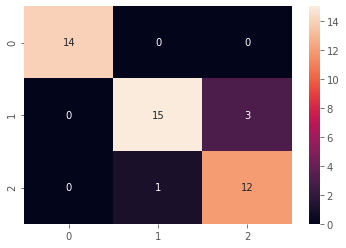

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot  =True)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.83      0.88        18
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



# Choosing the value of k

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

knn_cv.best_params_

{'n_neighbors': 6}

In [32]:
knn_cv.best_score_

0.9800000000000001